# **Pytorch 실습**

## 1. **당뇨병 데이터 분류**

In [39]:
# 라이블러리 불러오기
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [3]:
data=pd.read_csv("C:/Users/samsung-user/OneDrive/바탕 화면/인공지능개론/5주차/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 데이터 /타겟 분리
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [6]:
# 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [8]:
# 파이토치 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [9]:
# DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614]),
 torch.Size([154]))

### * 모델 정의

In [11]:
class DiabatesDense(nn.Module):
    def __init__(self):
        super(DiabatesDense, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 2 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = DiabatesDense()

### * 손실함수 및 최적화 기법 정의

In [12]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### * 모델 학습

In [16]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        labels = labels.view(-1, 1).float()
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).int()  # 0.5 기준 이진 분류
            total += labels.size(0)
            correct += (predicted.view(-1) == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.4256, Accuracy: 72.73%
Epoch 2/20, Loss: 0.4193, Accuracy: 73.38%
Epoch 3/20, Loss: 0.4145, Accuracy: 71.43%
Epoch 4/20, Loss: 0.4237, Accuracy: 72.73%
Epoch 5/20, Loss: 0.4192, Accuracy: 73.38%
Epoch 6/20, Loss: 0.4134, Accuracy: 73.38%
Epoch 7/20, Loss: 0.3971, Accuracy: 70.78%
Epoch 8/20, Loss: 0.3988, Accuracy: 72.73%
Epoch 9/20, Loss: 0.4001, Accuracy: 73.38%
Epoch 10/20, Loss: 0.3913, Accuracy: 74.03%
Epoch 11/20, Loss: 0.3953, Accuracy: 73.38%
Epoch 12/20, Loss: 0.4257, Accuracy: 72.08%
Epoch 13/20, Loss: 0.3913, Accuracy: 72.73%
Epoch 14/20, Loss: 0.4026, Accuracy: 74.03%
Epoch 15/20, Loss: 0.4018, Accuracy: 73.38%
Epoch 16/20, Loss: 0.3866, Accuracy: 74.68%
Epoch 17/20, Loss: 0.3855, Accuracy: 74.68%
Epoch 18/20, Loss: 0.3967, Accuracy: 72.73%
Epoch 19/20, Loss: 0.3760, Accuracy: 72.73%
Epoch 20/20, Loss: 0.3831, Accuracy: 74.03%
Training complete.


### * 모델 평가

In [19]:
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).int().view(-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='binary')
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')

# Calculate specificity (1 - false positive rate)
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0.0)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[79 12]
 [28 35]]
F1 Score: 0.64
Precision: 0.74
Recall: 0.56
Specificity: 0.71


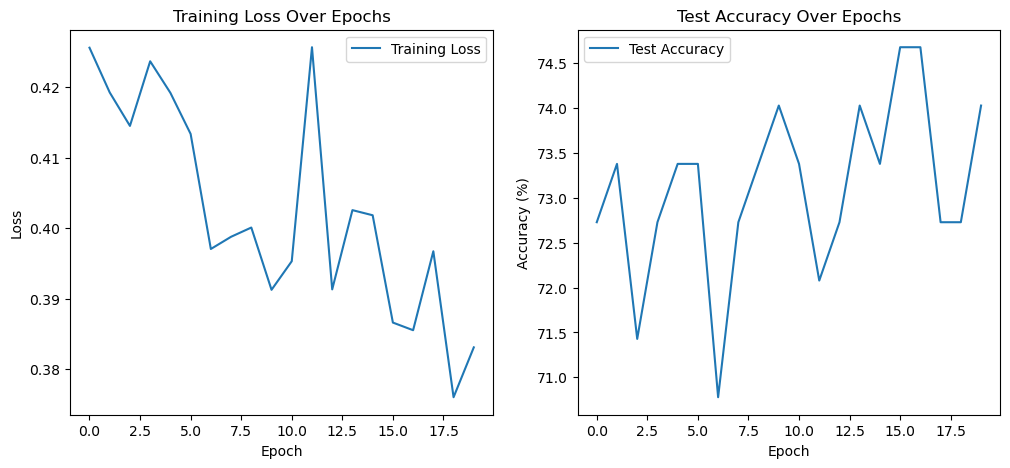

In [21]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

## **2. 당뇨병 데이터 회귀**

In [46]:
# 범주형 인코딩
data['Outcome'] = LabelEncoder().fit_transform(data['Outcome'])

In [48]:
# 데이터 /타겟 분리
X = data.drop('BMI', axis=1).values
y = data['BMI'].values.astype(np.float32)

In [49]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [51]:
# 파이토치 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### * 모델 정의

In [54]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

### * 손실함수 및 최적화 기법 정의

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### * 모델 학습

In [56]:
# 학습 루프
model.train()
for epoch in range(50):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1, Loss: 1059.4705
Epoch 2, Loss: 1003.2117
Epoch 3, Loss: 903.1287
Epoch 4, Loss: 759.4363
Epoch 5, Loss: 553.0360
Epoch 6, Loss: 343.6023
Epoch 7, Loss: 182.7355
Epoch 8, Loss: 112.6880
Epoch 9, Loss: 88.9760
Epoch 10, Loss: 79.8187
Epoch 11, Loss: 74.7350
Epoch 12, Loss: 73.9333
Epoch 13, Loss: 67.4184
Epoch 14, Loss: 64.8724
Epoch 15, Loss: 63.6861
Epoch 16, Loss: 59.6482
Epoch 17, Loss: 59.8408
Epoch 18, Loss: 57.1482
Epoch 19, Loss: 57.5258
Epoch 20, Loss: 59.2336
Epoch 21, Loss: 54.4938
Epoch 22, Loss: 53.6304
Epoch 23, Loss: 52.5653
Epoch 24, Loss: 51.5953
Epoch 25, Loss: 52.7891
Epoch 26, Loss: 49.1059
Epoch 27, Loss: 49.0077
Epoch 28, Loss: 51.8597
Epoch 29, Loss: 56.3450
Epoch 30, Loss: 47.6495
Epoch 31, Loss: 46.9290
Epoch 32, Loss: 45.5590
Epoch 33, Loss: 45.8450
Epoch 34, Loss: 47.7806
Epoch 35, Loss: 44.5004
Epoch 36, Loss: 43.7420
Epoch 37, Loss: 44.0505
Epoch 38, Loss: 42.8296
Epoch 39, Loss: 43.2922
Epoch 40, Loss: 43.0223
Epoch 41, Loss: 42.9556
Epoch 42, Loss:

### * 모델 평가

In [59]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
rmse = root_mean_squared_error(actuals, preds)
mae = mean_absolute_error(actuals, preds)

print(f"Test MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Test MSE: 53.1281, RMSE: 7.2889, MAE: 5.2483


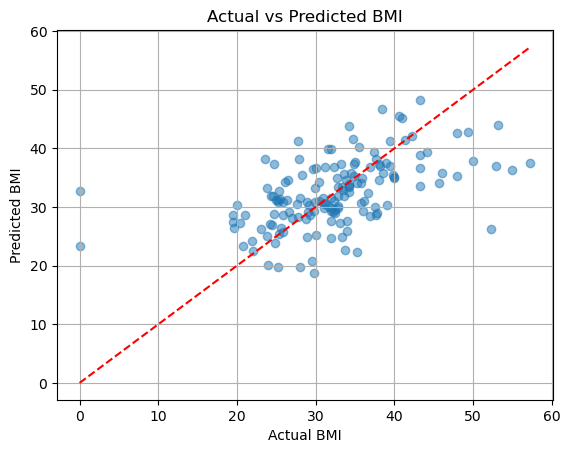

In [60]:
# 시각화
plt.scatter(actuals, preds, alpha=0.5)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # y=x 라인
plt.grid(True)
plt.show()